# Cybersecurity Bachelor's Degree - Data Analysis & Visualization
This notebook visualizes my academic progress during my **Bachelor of Applied Science in Cybersecurity**.
It includes my **GPA trends and milestones** to showcase my academic journey.

In [30]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from PIL import Image as PILImage

In [31]:
# Ensure necessary directories exist
os.makedirs("plots", exist_ok=True)
os.makedirs("images", exist_ok=True)  # New directory for images

In [32]:
# Set dark mode theme for plots
plt.style.use("dark_background")

In [33]:
# Load data files only if they exist
data_files = {
    "GPA": "data/gpa_over_time.csv",
    "Grades": "data/course_grades_distribution.csv",
    "Credits vs GPA": "data/credits_attempted_vs_gpa.csv",
    "Milestones": "data/milestones.csv",
}

In [34]:
dfs = {}
for key, file in data_files.items():
    if os.path.exists(file):
        dfs[key] = pd.read_csv(file)
        print(f"Loaded {key} data successfully.")
    else:
        print(f"Warning: {file} not found! Skipping this dataset.")

Loaded GPA data successfully.
Loaded Grades data successfully.


In [35]:
# Extract datasets
df_gpa = dfs.get("GPA")
df_grades = dfs.get("Grades")
df_credits_gpa = dfs.get("Credits vs GPA")
df_milestones = dfs.get("Milestones")

In [36]:
# === Display Degree Image at the Start ===
degree_path = "images/cyber-degree.jpg"  # Place the uploaded image here

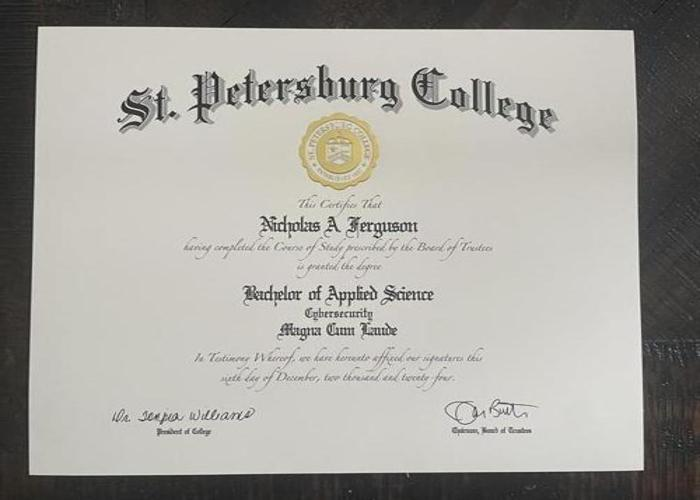

In [40]:
if os.path.exists(degree_path):
    # Open, rotate, and resize image
    img = PILImage.open(degree_path)
    img = img.rotate(270, expand=True)  # Rotate 270 degrees to make it upright
    img = img.resize((700, 500))  # Resize to fit well in the notebook
    rotated_path = "plots/cyber-degree-rotated.jpg"
    img.save(rotated_path)
    display(Image(filename=rotated_path))
else:
    print("Degree image not found!")


## GPA Progression Over Time
This visualization shows my **Term GPA vs. Cumulative GPA** for each semester.
A steady upward trend in **Cumulative GPA** indicates consistent academic improvement.

The cybersecurity field requires analytical thinking and a problem-solving mindset, both of which are reflected in academic performance.

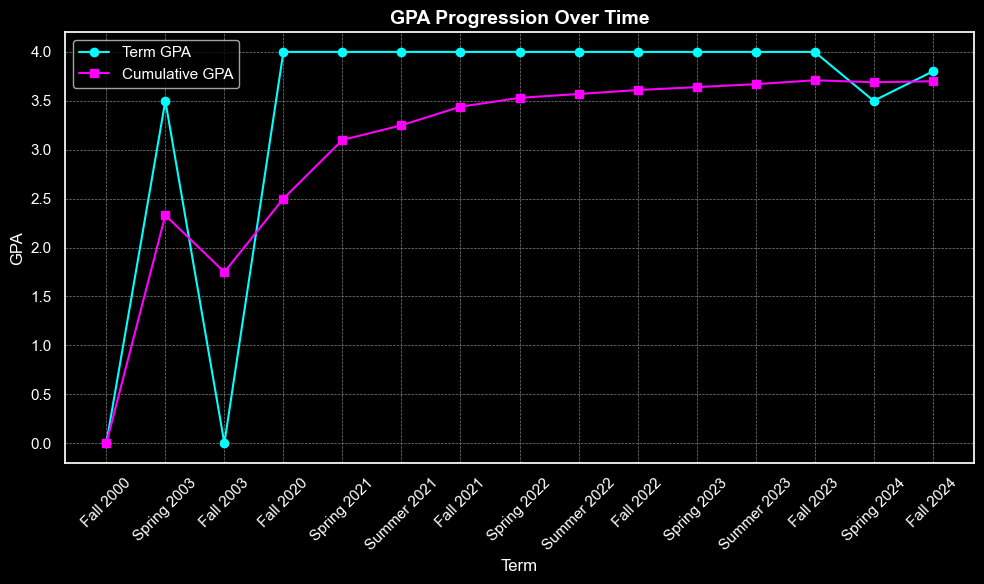

In [41]:
# === GPA Progression Over Time ===
if df_gpa is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(df_gpa['Term'], df_gpa['Term_GPA'], marker='o', label='Term GPA', color='cyan')
    plt.plot(df_gpa['Term'], df_gpa['Cumulative_GPA'], marker='s', label='Cumulative GPA', color='magenta')
    plt.title('GPA Progression Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Term')
    plt.ylabel('GPA')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('plots/gpa_progression.png', dpi=300)
    plt.show()

## Grade Distribution
This chart shows the distribution of grades across different courses.
High concentrations of **A’s and B’s** reflect strong academic performance in cybersecurity and related subjects.

Understanding data trends like this is crucial in cybersecurity for risk analysis and threat modeling.

C:\Users\user\AppData\Local\Temp\ipykernel_19360\1948271807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_grades, x='Grade', order=['A', 'B', 'C', 'D', 'F', 'W', 'P'], palette="coolwarm")


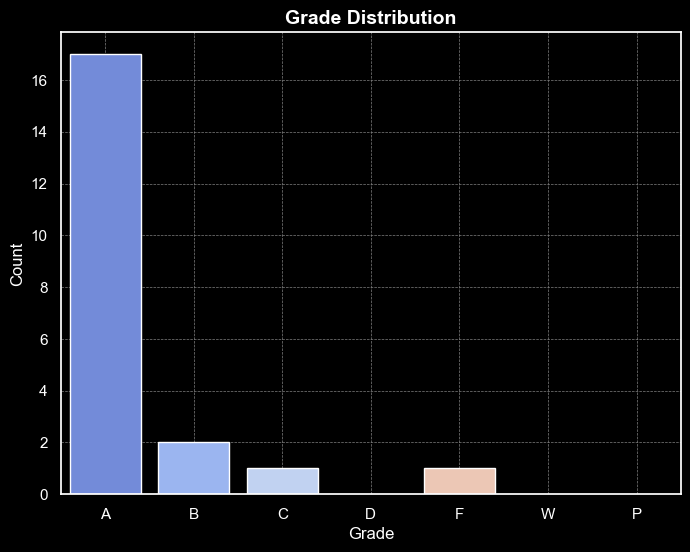

In [42]:
# === Grade Distribution Bar Chart ===
if df_grades is not None:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_grades, x='Grade', order=['A', 'B', 'C', 'D', 'F', 'W', 'P'], palette="coolwarm")
    plt.title('Grade Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.savefig('plots/grade_distribution.png', dpi=300)
    plt.show()

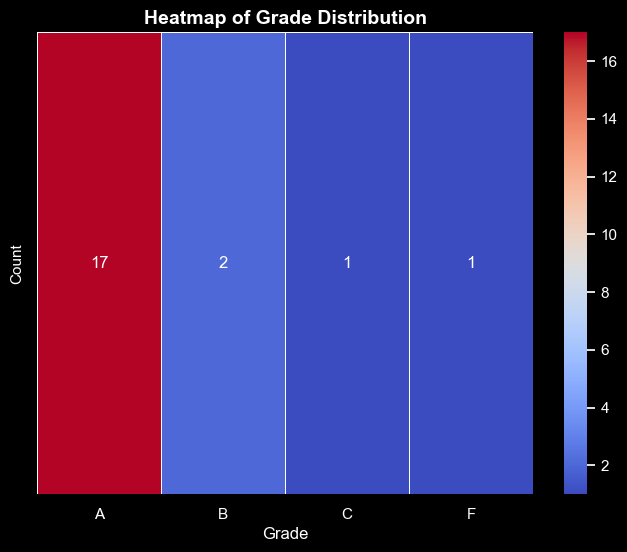

In [44]:
# === Heatmap of Grade Distribution ===
if df_grades is not None:
    plt.figure(figsize=(8, 6))
    
    # Creating a pivot table for heatmap
    grade_pivot = df_grades.pivot_table(index="Grade", aggfunc="size").reset_index()
    grade_pivot.columns = ["Grade", "Count"]
    
    # Convert to a heatmap-friendly format
    heatmap_data = grade_pivot.set_index("Grade").T
    
    # Generate heatmap
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title('Heatmap of Grade Distribution', fontsize=14, fontweight='bold')
    plt.savefig('plots/heatmap_grades.png', dpi=300)
    plt.show()